In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [22]:
df=pd.read_csv('stroke.csv')

In [23]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [24]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [25]:
df.shape

(5110, 12)

In [26]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [27]:
#well I will replce these NAN values with the mean as we don't have much data and BMI don't change that much
bmi_mean=df["bmi"].mean()
df['bmi'].fillna(value=bmi_mean,inplace=True)
bmi_mean

28.893236911794673

In [28]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [30]:
#We dont need ID column
df.drop('id', axis=1, inplace=True)

In [31]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


<AxesSubplot:xlabel='age', ylabel='Density'>

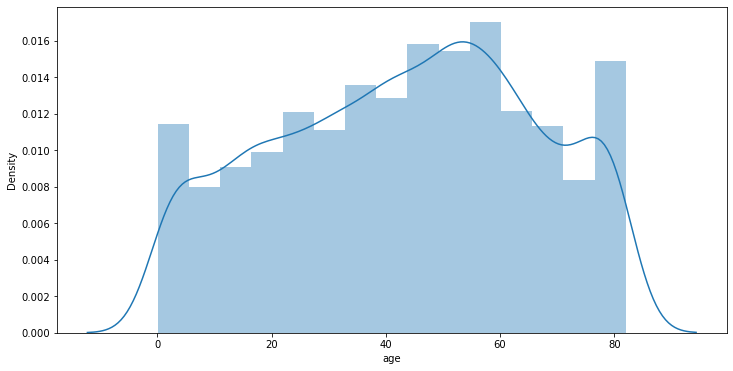

In [34]:
#Now let's do some EDA to understand our data more

plt.figure(figsize=(12,6))
sns.distplot(df['age'],bins=15)

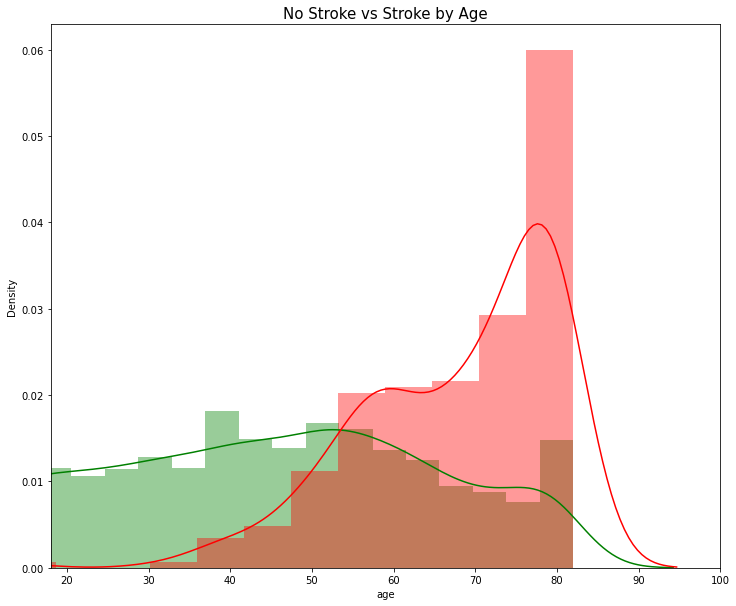

In [35]:
plt.figure(figsize=(12,10))

sns.distplot(df[df['stroke'] == 0]["age"], color='green')
sns.distplot(df[df['stroke'] == 1]["age"], color='red')

plt.title('No Stroke vs Stroke by Age', fontsize=15)
plt.xlim([18,100])
plt.show()

<AxesSubplot:xlabel='gender', ylabel='count'>

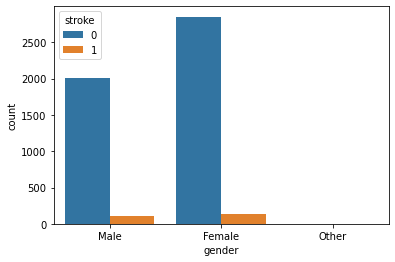

In [36]:
sns.countplot(x='gender',data=df,hue='stroke')

In [38]:
df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [39]:
df.drop(df.loc[df['gender']=='Other'].index,inplace=True)

<AxesSubplot:xlabel='gender', ylabel='count'>

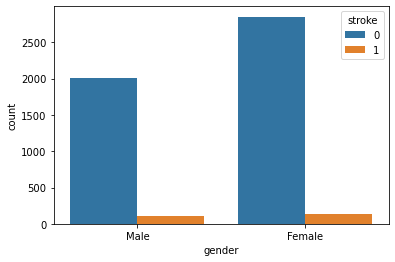

In [41]:
sns.countplot(x='gender',data=df,hue='stroke')

0    4860
1     249
Name: stroke, dtype: int64

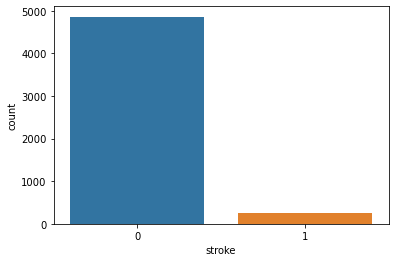

In [42]:
sns.countplot(x='stroke', data=df)
df.stroke.value_counts()

In [43]:
#Hugely class imbalance

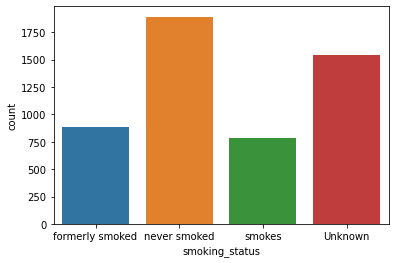

In [44]:
sns.countplot(x='smoking_status', data=df);

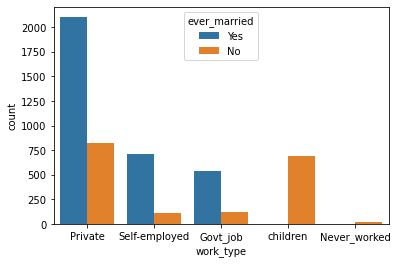

In [45]:
sns.countplot(x='work_type', hue='ever_married', data=df);

In [46]:
#Data Preprocessing
X = df.iloc[:,0:-1].values
y = df.iloc[:, -1].values

In [47]:
#Label Encoding
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder


In [48]:
l_e = LabelEncoder()
X[:, 0] = l_e.fit_transform(X[:, 0]) # gender column
X[:, 4] = l_e.fit_transform(X[:, 4]) # ever_married column
X[:, 6] = l_e.fit_transform(X[:, 6]) # Residence_type column

In [49]:
c_t = ColumnTransformer(transformers= [('encoder', OneHotEncoder(), [5,9])], remainder= 'passthrough')
X = np.array(c_t.fit_transform(X))

In [50]:
#Split the data 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((4087, 17), (4087,), (1022, 17), (1022,))

In [52]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [53]:
#Upsampling the Data

In [54]:
print (sum(y_train == 1))
print (sum(y_train == 0))

187
3900


In [57]:
from imblearn.over_sampling import SMOTE

In [58]:
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train.ravel())

In [59]:
print (X_train.shape)
print (y_train.shape)
print (sum(y_train == 1))
print (sum(y_train == 0))

(7800, 17)
(7800,)
3900
3900


In [60]:
#Now our data is balanced nicely

In [61]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report, roc_curve, plot_roc_curve, auc, precision_recall_curve, plot_precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score

In [63]:
from sklearn.linear_model import LogisticRegression

In [64]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
score = cross_val_score(model, X_train, y_train, cv = 6)
precision = precision_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print ('train score of LogisticRegression is', score.mean(),'%')
print ('--')
print ('Precision score is ', precision)
print ('--')
print ('ROC Score is', roc)
print ('--')
print ('Recall Score is ', recall)

train score of LogisticRegression is 0.7906410256410257 %
--
Precision score is  0.1649122807017544
--
ROC Score is 0.7550739247311828
--
Recall Score is  0.7580645161290323
